In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as stats
from scipy.stats import linregress


In [2]:
# Reading CSV files into dataframes
daily_activity_df = pd.read_csv("dailyActivity_merged (1).csv")
fitbit_df = pd.read_csv("FitBit data.csv")

#check DataFrames 
daily_activity_df.head()

  

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [3]:
fitbit_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [4]:
#Print the column names
print(daily_activity_df.columns)
print(fitbit_df .columns)   

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')
Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')


In [5]:
#merging the DataFrames
merged_df = pd.concat([daily_activity_df, fitbit_df], ignore_index=True)
merged_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [6]:
# Print the number of rows in the merged dataset
print("merged_df:", len(merged_df))

merged_df: 1397


In [7]:
# find the duplicate rows by  ID, activity date and total distance
duplicate_df = merged_df[merged_df.duplicated(subset=["Id", "ActivityDate", "TotalSteps"])]

# Remove duplicates from the original data based on specific columns
cleaned_data = merged_df.drop_duplicates(subset=['Id', 'ActivityDate', 'TotalSteps'])

# Calculate all active minutes and all active distance and add to df
cleaned_data['AllActiveMinutes'] = cleaned_data['LightlyActiveMinutes'] + cleaned_data['FairlyActiveMinutes'] + cleaned_data['VeryActiveMinutes']
cleaned_data['AllActiveDistance'] = cleaned_data['LightActiveDistance'] + cleaned_data['ModeratelyActiveDistance'] + cleaned_data['VeryActiveDistance']

#duplicate_df.to_csv("duplicates.csv", index=False)
#cleaned_data.to_csv("cleaned_data.csv", index=False)

In [8]:
# Define recommended guidelines
# rec dail activity in mins
rec_mins_pw = 90

# Rec daily steps
rec_daily_steps = 10000



In [9]:
# Ensure the activity_date column is in datetime format
cleaned_data["ActivityDate"] = pd.to_datetime(cleaned_data["ActivityDate"])

# Calculate the total number of activity dates for each ID
activity_counts = cleaned_data.groupby("Id")["ActivityDate"].nunique().reset_index()
activity_counts.columns = ["Id", "TotalActivityDates"]

# Calculate the total of all other columns for each ID
# Exclude the 'activity_date' column for the sum operation
columns_to_sum = cleaned_data.columns.difference(["ActivityDate"])

column_sums = cleaned_data[columns_to_sum].groupby("Id").sum().reset_index()

# Merge the two results
result = pd.merge(activity_counts, column_sums, on="Id")

# Rename columns to include the word 'Total' in each column header
result.columns = ['Sum' + col if col != 'Id' else col for col in result.columns]

# Display the final result
print(result)

            Id  SumTotalActivityDates  SumAllActiveDistance  \
0   1503960366                     49            386.320001   
1   1624580081                     49            173.139999   
2   1644430081                     40            226.140001   
3   1844505072                     42             81.719999   
4   1927972279                     42             37.790000   
5   2022484408                     42            355.919999   
6   2026352035                     42            132.300000   
7   2320127002                     42            124.199999   
8   2347167796                     32            212.050000   
9   2873212765                     42            211.580001   
10  2891001357                      8              4.830000   
11  3372868164                     30            135.889999   
12  3977333714                     41            294.529999   
13  4020332650                     62            132.290000   
14  4057192912                     35             55.37

In [10]:
# Add new column for total active minutes
result["TotalActiveMinutes"] = result["SumFairlyActiveMinutes"] + result["SumLightlyActiveMinutes"] + result["SumVeryActiveMinutes"]

# Add new column for total active distance
result["TotalActiveDistance"] = result["SumLightActiveDistance"] + result["SumModeratelyActiveDistance"] + result["SumVeryActiveDistance"]

# Display the final result with new columns
print(result)


            Id  SumTotalActivityDates  SumAllActiveDistance  \
0   1503960366                     49            386.320001   
1   1624580081                     49            173.139999   
2   1644430081                     40            226.140001   
3   1844505072                     42             81.719999   
4   1927972279                     42             37.790000   
5   2022484408                     42            355.919999   
6   2026352035                     42            132.300000   
7   2320127002                     42            124.199999   
8   2347167796                     32            212.050000   
9   2873212765                     42            211.580001   
10  2891001357                      8              4.830000   
11  3372868164                     30            135.889999   
12  3977333714                     41            294.529999   
13  4020332650                     62            132.290000   
14  4057192912                     35             55.37

In [11]:
# Calculate the average of each column
averages = result.mean()
# Exclude the Id column
averages_excluding_id = averages.drop("Id")
# Format the values to 4 decimal places
averages_formatted = averages_excluding_id.round(4)
print(averages_formatted)

SumTotalActivityDates              39.2286
SumAllActiveDistance              204.7317
SumAllActiveMinutes              8719.4857
SumCalories                     90456.3714
SumFairlyActiveMinutes            534.9714
SumLightActiveDistance            127.4626
SumLightlyActiveMinutes          7399.0286
SumLoggedActivitiesDistance         5.2480
SumModeratelyActiveDistance        21.4923
SumSedentaryActiveDistance          0.0680
SumSedentaryMinutes             39616.6286
SumTotalDistance                  208.3300
SumTotalSteps                  290611.8571
SumTrackerDistance                207.2437
SumVeryActiveDistance              55.7769
SumVeryActiveMinutes              785.4857
TotalActiveMinutes               8719.4857
TotalActiveDistance               204.7317
dtype: float64


Here I want to see if each ID met the daily recommended activity time and total step counts

In [12]:
# Calculate average daily active minutes and daily steps
result['AverageDailyActiveMinutes'] = result['TotalActiveMinutes'] / result['SumTotalActivityDates']
result['AverageDailySteps'] = result['SumTotalSteps'] / result['SumTotalActivityDates']

# Determine if they met the recommended daily active minutes and step count
result['Met daily rec activity mins'] = result['AverageDailyActiveMinutes'] >= rec_mins_pw
result['Met daily rec step count'] = result['AverageDailySteps'] >= rec_daily_steps

# Convert boolean values to 'TRUE'/'FALSE'
result['Met daily rec activity mins'] = result['Met daily rec activity mins'].apply(lambda x: 'TRUE' if x else 'FALSE')
result['Met daily rec step count'] = result['Met daily rec step count'].apply(lambda x: 'TRUE' if x else 'FALSE')

# Count the number of 'TRUE' values in the specified columns
true_activity_mins_count = result['Met daily rec activity mins'].value_counts().get('TRUE', 0)
true_step_count = result['Met daily rec step count'].value_counts().get('TRUE', 0)

# Print the counts
print(f"Number of ID's meeting recommended daily active minutes: {true_activity_mins_count}")
print(f"Number of ID's meeting recommended daily step count: {true_step_count}")

# Display the final result
print(result)

# convert to csv
#result.to_csv("result.csv", index=False)

Number of ID's meeting recommended daily active minutes: 32
Number of ID's meeting recommended daily step count: 7
            Id  SumTotalActivityDates  SumAllActiveDistance  \
0   1503960366                     49            386.320001   
1   1624580081                     49            173.139999   
2   1644430081                     40            226.140001   
3   1844505072                     42             81.719999   
4   1927972279                     42             37.790000   
5   2022484408                     42            355.919999   
6   2026352035                     42            132.300000   
7   2320127002                     42            124.199999   
8   2347167796                     32            212.050000   
9   2873212765                     42            211.580001   
10  2891001357                      8              4.830000   
11  3372868164                     30            135.889999   
12  3977333714                     41            294.529999   
13 

1. Correlation between
   - LightlyActiveMinutes vs. LightActiveDistance
   - FairlyActiveMinutes vs. ModeratelyActiveDistance
   - VeryActiveMinutes vs. VeryActiveDistance
   - AllActiveMinutes vs. AllActiveDistance

Correlations between activity minutes and distances:
LightlyActiveMinutes vs. LightActiveDistance: 0.8762935452942788
FairlyActiveMinutes vs. ModeratelyActiveDistance: 0.6979928705143341
VeryActiveMinutes vs. VeryActiveDistance: 0.8348675153819457
AllActiveMinutes vs. AllActiveDistance: 0.7539476699627684


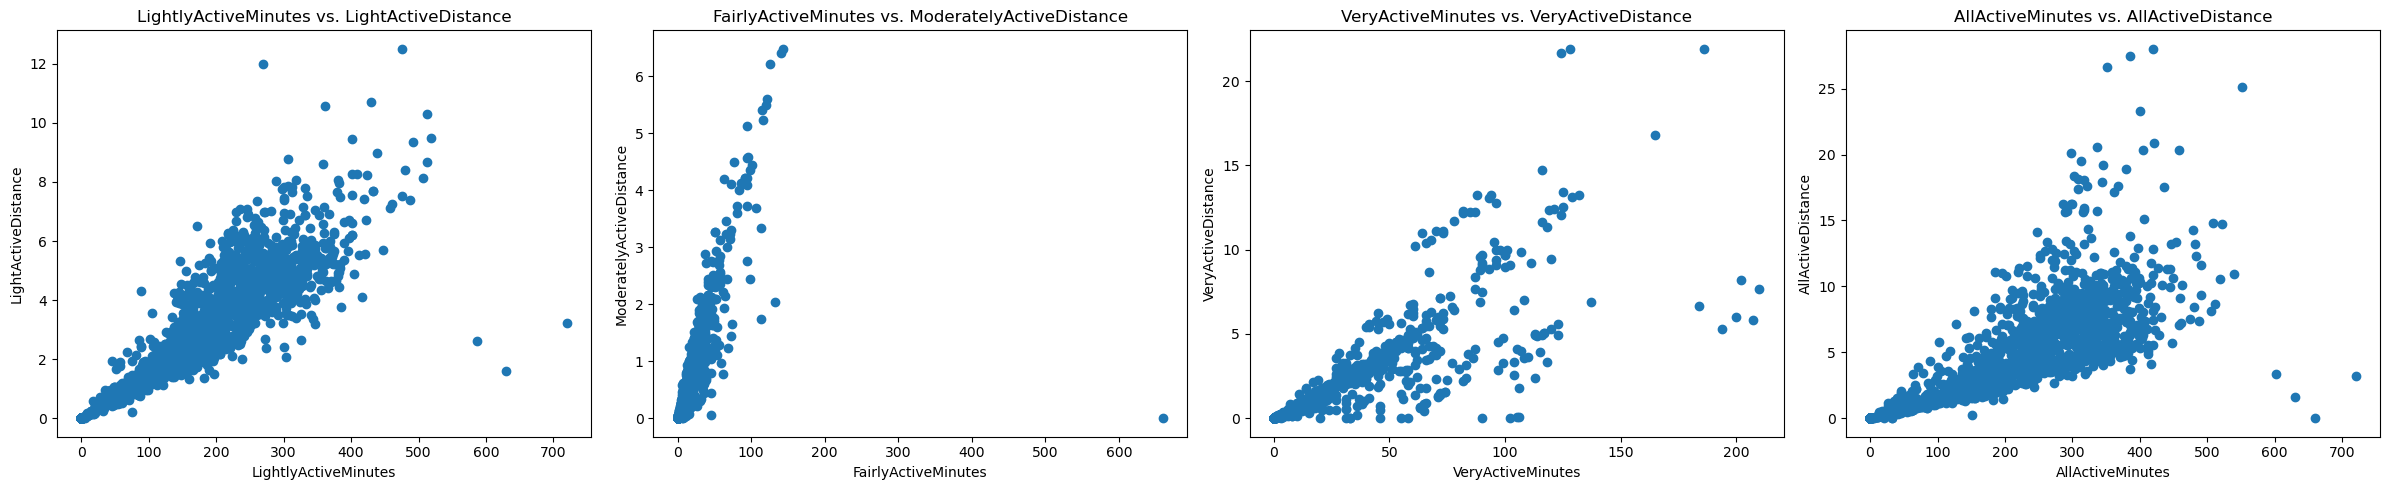

In [13]:
# Calculate the correlations between ActiviteMinutes vs ActiviteDistance
correlations = {
    'LightlyActiveMinutes vs. LightActiveDistance': cleaned_data[['LightlyActiveMinutes', 'LightActiveDistance']].corr().iloc[0, 1],
    'FairlyActiveMinutes vs. ModeratelyActiveDistance': cleaned_data[['FairlyActiveMinutes', 'ModeratelyActiveDistance']].corr().iloc[0, 1],
    'VeryActiveMinutes vs. VeryActiveDistance': cleaned_data[['VeryActiveMinutes', 'VeryActiveDistance']].corr().iloc[0, 1],
    'AllActiveMinutes vs. AllActiveDistance': cleaned_data[['AllActiveMinutes', 'AllActiveDistance']].corr().iloc[0, 1]
}

print("Correlations between activity minutes and distances:")
for key, value in correlations.items():
    print(f"{key}: {value}")

# Visualize the correlations
fig, axes = plt.subplots(1, 4, figsize=(24, 5))

# LightlyActiveMinutes vs. LightActiveDistance
axes[0].scatter(cleaned_data['LightlyActiveMinutes'], cleaned_data['LightActiveDistance'])
axes[0].set_title('LightlyActiveMinutes vs. LightActiveDistance')
axes[0].set_xlabel('LightlyActiveMinutes')
axes[0].set_ylabel('LightActiveDistance')

# FairlyActiveMinutes vs. ModeratelyActiveDistance
axes[1].scatter(cleaned_data['FairlyActiveMinutes'], cleaned_data['ModeratelyActiveDistance'])
axes[1].set_title('FairlyActiveMinutes vs. ModeratelyActiveDistance')
axes[1].set_xlabel('FairlyActiveMinutes')
axes[1].set_ylabel('ModeratelyActiveDistance')

# VeryActiveMinutes vs. VeryActiveDistance
axes[2].scatter(cleaned_data['VeryActiveMinutes'], cleaned_data['VeryActiveDistance'])
axes[2].set_title('VeryActiveMinutes vs. VeryActiveDistance')
axes[2].set_xlabel('VeryActiveMinutes')
axes[2].set_ylabel('VeryActiveDistance')

# AllActiveMinutes vs. AllActiveDistance
axes[3].scatter(cleaned_data['AllActiveMinutes'], cleaned_data['AllActiveDistance'])
axes[3].set_title('AllActiveMinutes vs. AllActiveDistance')
axes[3].set_xlabel('AllActiveMinutes')
axes[3].set_ylabel('AllActiveDistance')

plt.tight_layout()
plt.show()

Analysis

All the graphs show there is a atrong positive correaltion between active minutes and the corresponding distances for light and very active activities, and a moderate positive correlation for moderate activities. This indicates that as users spend more time being active, they cover more distance, showing consistent tracking by Fitbit.
The data indicates that users are engaging in various levels of activity, and Fitbit is accurately capturing these activities, which can motivate users to continue meeting or exceeding their exercise goals.
The strong correlations and consistent tracking suggest that having a Fitbit inspires users to be more active, as they can reliably track their activity minutes and distances. This aligns with the hypothesis that Fitbit users are motivated to meet the recommended exercise guidelines.
Overall, the analysis supports the idea that Fitbit is an effective tool for tracking and inspiring physical activity, helping users to meet their exercise goals by providing accurate and reliable data on their activity levels.

2. Comparison of averages on:
   - LightActiveDistance
   - ModeratelyActiveDistance
   - VeryActiveDistance
   - AllActiveDistance

Average VeryActiveDistance: 1.3974158904590537
Average ModeratelyActiveDistance: 0.5384609863274039
Average LightActiveDistance: 3.1934073011263533
Average AllActiveDistance: 5.129284177912811
Total days in dataset: 1397
Count of days with VeryActiveDistance > 0: 739
Count of days with ModeratelyActiveDistance > 0: 783
Count of days with LightActiveDistance > 0: 1238
Count of days with AllActiveDistance > 0: 1239


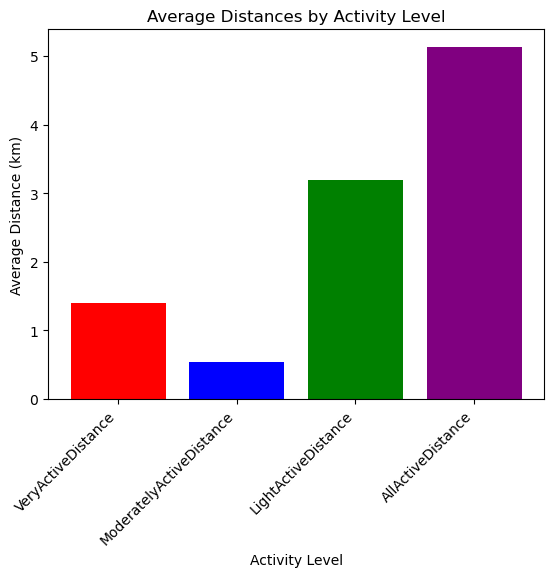

In [14]:
# Calculate the averages
avg_very_active = cleaned_data['VeryActiveDistance'].mean()
avg_moderately_active = cleaned_data['ModeratelyActiveDistance'].mean()
avg_light_active = cleaned_data['LightActiveDistance'].mean()
avg_all_active = cleaned_data['AllActiveDistance'].mean()

print(f"Average VeryActiveDistance: {avg_very_active}")
print(f"Average ModeratelyActiveDistance: {avg_moderately_active}")
print(f"Average LightActiveDistance: {avg_light_active}")
print(f"Average AllActiveDistance: {avg_all_active}")

# Get the count of days with a distance greater than 0
total_days = cleaned_data.shape[0]
count_very_active = (cleaned_data['VeryActiveDistance'] > 0).sum()
count_moderately_active = (cleaned_data['ModeratelyActiveDistance'] > 0).sum()
count_light_active = (cleaned_data['LightActiveDistance'] > 0).sum()
count_all_active = (cleaned_data['AllActiveDistance'] > 0).sum()

print(f"Total days in dataset: {total_days}")
print(f"Count of days with VeryActiveDistance > 0: {count_very_active}")
print(f"Count of days with ModeratelyActiveDistance > 0: {count_moderately_active}")
print(f"Count of days with LightActiveDistance > 0: {count_light_active}")
print(f"Count of days with AllActiveDistance > 0: {count_all_active}")

# Visualize the comparison
activity_distances = ['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'AllActiveDistance']
averages = [avg_very_active, avg_moderately_active, avg_light_active, avg_all_active]

plt.bar(activity_distances, averages, color=['red', 'blue', 'green', 'purple'])
plt.title('Average Distances by Activity Level')
plt.xlabel('Activity Level')
plt.ylabel('Average Distance (km)')
plt.xticks(rotation=45, ha='right')
plt.show()

Analysis

Numbers and graphs shows that out of 1397 recorded days of data for the 35 participants there were 1239 recorded days where there was activity. This shows that about there were some days where no activity was done by participants. 
Most of the recorded activity was light activity (put in percentage).
Looking at average distances recorded, we can see that LightActiveDistance was much higher than the other activity levels though this could be because there was more data recorded at lighter activity levels as well as the tendency for users to not push themselves too much in the Very activity level.
Another thing to note is that there are some zero values in the data that could skew the results

3. Distribution of TotalSteps against TotalActiveMinutes

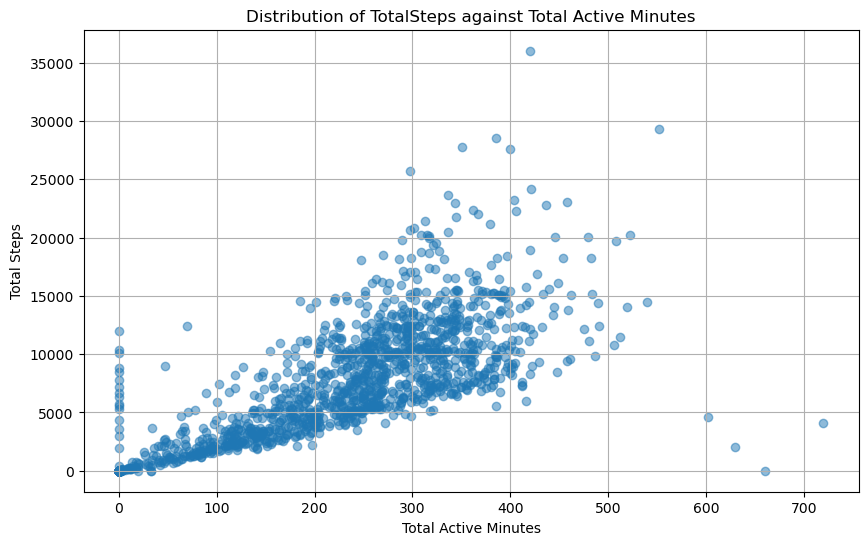

In [15]:
# Calculate total active minutes
cleaned_data['TotalActiveMinutes'] = cleaned_data['LightlyActiveMinutes'] + cleaned_data['FairlyActiveMinutes'] + cleaned_data['VeryActiveMinutes']

# Plot the distribution of TotalSteps against TotalActiveMinutes
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data['TotalActiveMinutes'], cleaned_data['TotalSteps'], alpha=0.5)
plt.title('Distribution of TotalSteps against Total Active Minutes')
plt.xlabel('Total Active Minutes')
plt.ylabel('Total Steps')
plt.grid(True)
plt.show()

Analysis

This scatter plot displays the relationship between TotalSteps and Total Active Minutes (sum of LightlyActiveMinutes, FairlyActiveMinutes, and VeryActiveMinutes).
Each point represents a day's data, plotting the total number of steps against the total active minutes for that day.
There is a positive correlation between TotalSteps and Total Active Minutes. As Total Active Minutes increase, the number of TotalSteps generally increases. There are some outliers with very high Total Active Minutes (300-700 minutes) and corresponding high TotalSteps.
The distribution also shows some strange data where even though the total active minutes is 0, steps were recorded. This would indicate either falsely recorded data via user input or a malfunction in the Fitbit.

Talk about comparison to AllActiveMinutes vs. AllActiveDistance scatterplot, how shape is similar.

4. Percentage of total distance from TrackerDistance versus LoggedActivitiesDistance and Percentage of false tracked distances from TrackerDistance versus LoggedActivitiesDistance

Percentage of total distance from TrackerDistance: 99.48%
Percentage of total distance from LoggedActivitiesDistance: 2.52%


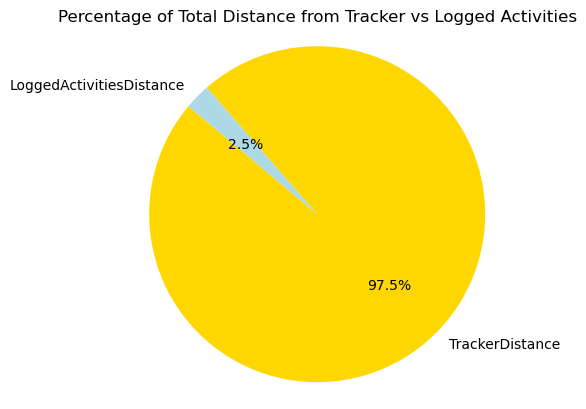

Total days in dataset: 1397
Number of false recordings (LoggedActivitiesDistance > TrackerDistance): 5
Percentage of false recordings: 0.36%


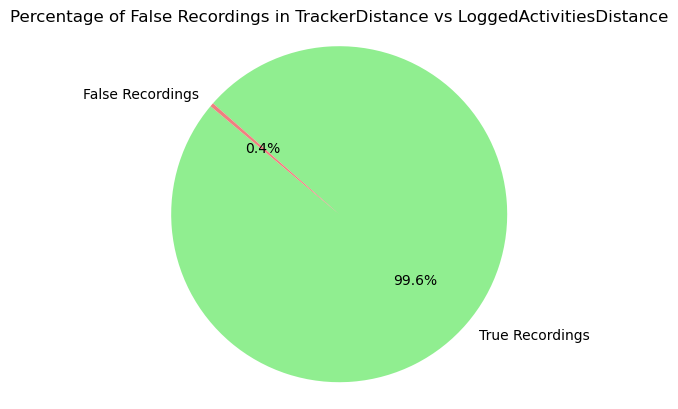

In [16]:
# Calculate total distance from both Tracker and LoggedActivities
total_tracker_distance = cleaned_data['TrackerDistance'].sum()
total_logged_activities_distance = cleaned_data['LoggedActivitiesDistance'].sum()
total_distance = cleaned_data['TotalDistance'].sum()

# Calculate the percentages
percentage_tracker = (total_tracker_distance / total_distance) * 100
percentage_logged_activities = (total_logged_activities_distance / total_distance) * 100

print(f"Percentage of total distance from TrackerDistance: {percentage_tracker:.2f}%")
print(f"Percentage of total distance from LoggedActivitiesDistance: {percentage_logged_activities:.2f}%")

# Visualize the percentages
labels = ['TrackerDistance', 'LoggedActivitiesDistance']
sizes = [percentage_tracker, percentage_logged_activities]
colors = ['gold', 'lightblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Total Distance from Tracker vs Logged Activities')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Identify false recordings
false_recordings = cleaned_data[cleaned_data['LoggedActivitiesDistance'] > cleaned_data['TrackerDistance']]

# Calculate the percentage of false recordings
total_days = cleaned_data.shape[0]
false_recordings_count = false_recordings.shape[0]
percentage_false_recordings = (false_recordings_count / total_days) * 100
percentage_true_recordings = 100 - percentage_false_recordings

print(f"Total days in dataset: {total_days}")
print(f"Number of false recordings (LoggedActivitiesDistance > TrackerDistance): {false_recordings_count}")
print(f"Percentage of false recordings: {percentage_false_recordings:.2f}%")

# Data for pie chart
labels = ['True Recordings', 'False Recordings']
sizes = [percentage_true_recordings, percentage_false_recordings]
colors = ['lightgreen', 'lightcoral']
explode = (0, 0.1)  # only "explode" the 2nd slice (False Recordings)

# Plot the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of False Recordings in TrackerDistance vs LoggedActivitiesDistance')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Anaylsis

Description:Percentage of Total Distance from Tracker vs Logged Activities

The pie chart illustrates the proportion of total distance recorded by the Fitbit tracker (TrackerDistance) compared to the distance logged manually by users (LoggedActivitiesDistance).
TrackerDistance accounts for 97.5% of the total distance, while LoggedActivitiesDistance accounts for only 2.5%.

Description:Percentage of False Recordings in TrackerDistance vs LoggedActivitiesDistance

The pie chart shows the percentage of false recordings where LoggedActivitiesDistance exceeds TrackerDistance.
Out of 1397 total days, there are only 5 days (0.4%) with false recordings, while 99.6% of the recordings are accurate.

Reliability on Fitbit Tracking: The overwhelming majority of distance data comes from the Fitbit tracker, suggesting that users primarily rely on the device to track their activities.
User Engagement: The minimal percentage of LoggedActivitiesDistance indicates that users may not frequently log activities manually, which implies they trust the device's automatic tracking capabilities.
Accuracy and Trust: The extremely low percentage of false recordings (0.4%) indicates that Fitbit's automatic tracking is highly accurate and reliable.

This indicates that users likely trust and depend on Fitbit tracking to record their activities rather than manually logging them. User's trust the Fitbit to record their data but may not be utilising the Fitbit's full capability to possibly track goals and milestones during activity.


"Do individuals who use a Fitbit meet the recommended exercise guideline of 90 active minutes per day?"

Statistical Testing Plan:
Null Hypothesis (H0): Individuals who use a Fitbit do not meet the recommended exercise guideline of 90 active minutes per day.
Alternative Hypothesis (H1): Individuals who use a Fitbit meet the recommended exercise guideline of 90 active minutes per day.

Test: Chi-Square Test for Independence

In [22]:
# Create a binary column for meeting the 90 active minutes guideline
cleaned_data['MeetsActiveMinutesGuideline'] = cleaned_data['AllActiveMinutes'] >= 90

# Calculate the observed frequencies that meet or do not meet guideline
observed_frequencies = cleaned_data['MeetsActiveMinutesGuideline'].value_counts().sort_index()
print("Observed Frequencies:")
print(observed_frequencies)

# Expected frequencies assuming no significant impact (e.g., equal probability)
expected_frequencies = [len(cleaned_data) / 2, len(cleaned_data) / 2]
print("Expected Frequencies:")
print(expected_frequencies)

# Degree of freedom
df = len(observed_frequencies) - 1

# Calculate the critical value with 95% confidence level
critical_value = stats.chi2.ppf(q=0.95, df=df)
print(f"Critical Value: {critical_value}")

# Perform the Chi-Square test
chi2, p_value = stats.chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)
print(f"Chi-squared test statistic: {chi2}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant association between using a Fitbit and meeting the exercise guideline of 90 active minutes per day.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between using a Fitbit and meeting the exercise guideline of 90 active minutes per day.")

Observed Frequencies:
MeetsActiveMinutesGuideline
False     280
True     1117
Name: count, dtype: int64
Expected Frequencies:
[698.5, 698.5]
Critical Value: 3.841458820694124
Chi-squared test statistic: 501.4810307802434
P-value: 4.5261488749160814e-111
Reject the null hypothesis. There is a significant association between using a Fitbit and meeting the exercise guideline of 90 active minutes per day.


Chi-Squared Test Results

Interpretation:
Chi-Squared Test Statistic and Critical Value:
The chi-squared test statistic (501.48) is much greater than the critical value (3.84). This indicates a significant difference between the observed and expected frequencies.

P-value:
The p-value (4.5261488749160814e-111) is far below the common significance level threshold (e.g., 0.05). This means the probability that the observed difference occurred by chance is extremely low.

Conclusion:
Given that the chi-squared test statistic is significantly greater than the critical value and the p-value is extremely small, we reject the null hypothesis (H0). This indicates that there is a significant association between using a Fitbit and meeting the recommended exercise guideline of 90 active minutes per day.

The results strongly suggest that individuals who use a Fitbit are more likely to meet the recommended guideline of 90 active minutes per day. This implies that Fitbit users are more engaged in achieving their daily activity goals, possibly due to the motivation and tracking provided by the device.
These findings highlight the potential effectiveness of Fitbit devices in promoting physical activity and helping individuals meet recommended exercise guidelines. 